<a href="https://www.kaggle.com/code/asmahattab/titanic-ml?scriptVersionId=148477052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Import Libraries
** <a class="anchor"  id="chapter1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Read in and Explore the Data**
We will read our training and testing data using *pd.read_csv*.

<a class="anchor"  id="chapter2"></a>

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
PassengerId = test['PassengerId']

In [4]:
PassengerId.shape

(418,)

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Preprocessing and EDA**

<a class="anchor"  id="subsection1"></a>

In [6]:
train.shape

(891, 12)

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <a class="anchor"  id="subsection2"></a>
 **Overview**
* PassengerId is the unique id of the row for each passenger.
* Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class
* Name, Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton



In [10]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

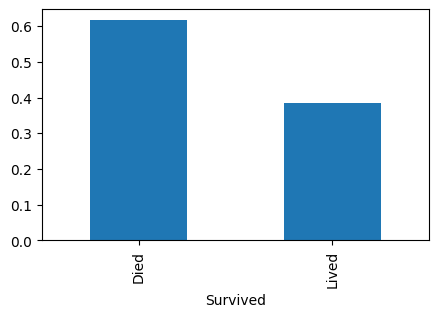

In [11]:
plt.figure(figsize=(5, 3));
survived_plt = train["Survived"].value_counts(normalize=True,).plot(kind='bar',);
survived_plt.set_xticks([0, 1])
survived_plt.set_xticklabels(['Died', 'Lived']);

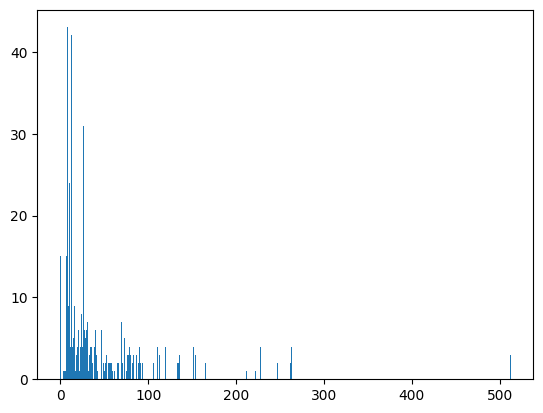

In [12]:
plt.bar((train['Fare'].value_counts()).index, (train['Fare'].value_counts()).values,width=0.9);

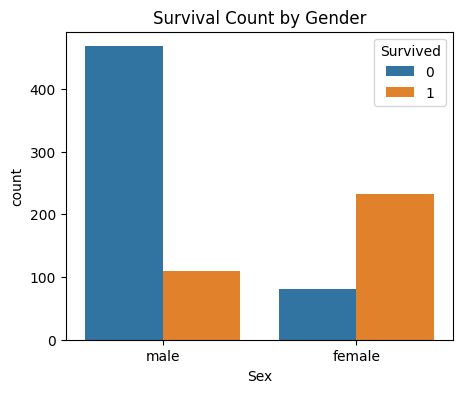

In [13]:
plt.figure(figsize=(5, 4))
sns.countplot(data=train,x='Sex',hue='Survived');
plt.title('Survival Count by Gender');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


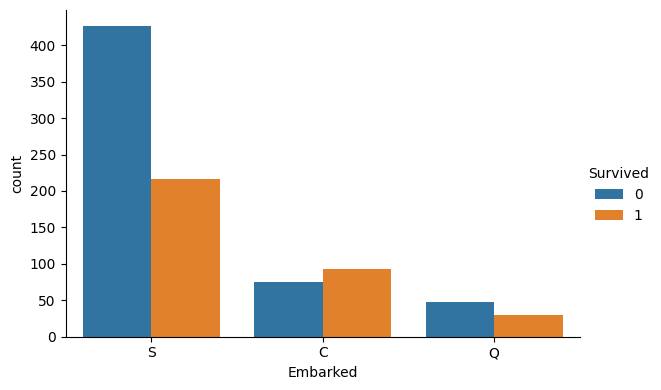

In [14]:
sns.catplot(x="Embarked", hue="Survived", data=train, kind="count", height=4, aspect=1.5);

In [15]:
train.groupby(['Pclass','Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847 



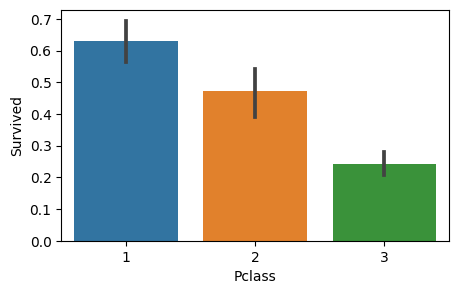

In [16]:
#draw a bar plot of survival by Pclass
plt.figure(figsize=(5, 3));
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("\nPercentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100,"\n")

**Age Feature**

In [17]:
train['Age'].agg(['min', 'max','mean'])

min      0.420000
max     80.000000
mean    29.699118
Name: Age, dtype: float64

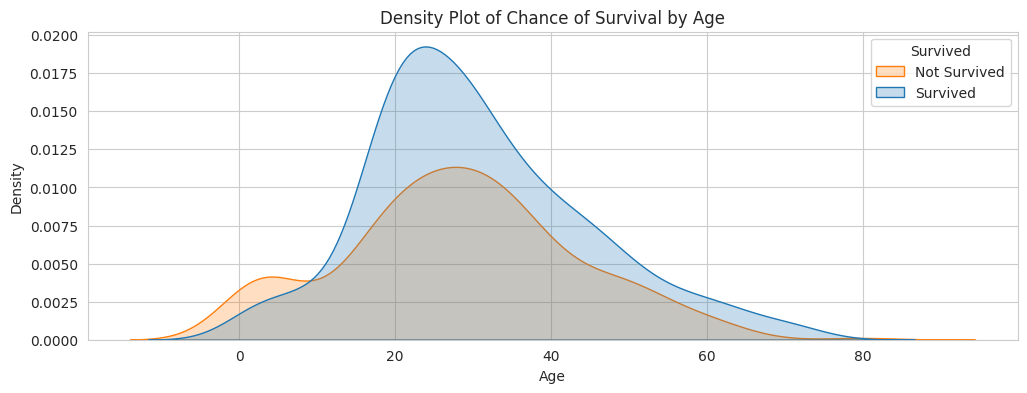

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))
sns.kdeplot(data=train, x="Age", hue="Survived", fill=True)
plt.xlabel("Age")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.title("Density Plot of Chance of Survival by Age");

In [19]:
train[train['Age']==train['Age'].min()]['Survived']

803    1
Name: Survived, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


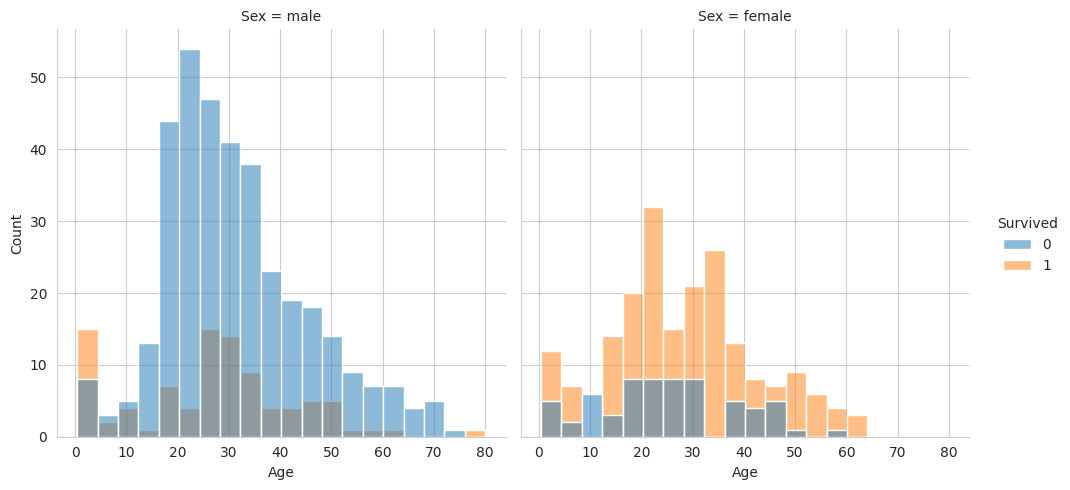

In [20]:
sns.displot(data=train,x='Age',col="Sex",hue='Survived');

**Fare Feature**

In [21]:
train["Fare"].max()

512.3292

In [22]:
train[train["Fare"]==train['Fare'].max()]['Survived']

258    1
679    1
737    1
Name: Survived, dtype: int64

In [23]:
train[train["Fare"]==train['Fare'].max()]['Cabin']

258            NaN
679    B51 B53 B55
737           B101
Name: Cabin, dtype: object

<a class="anchor"  id="subsection3"></a>
**Adding a new Feature "Family"**



In [24]:
train['Family']=train['SibSp']+train['Parch']+1

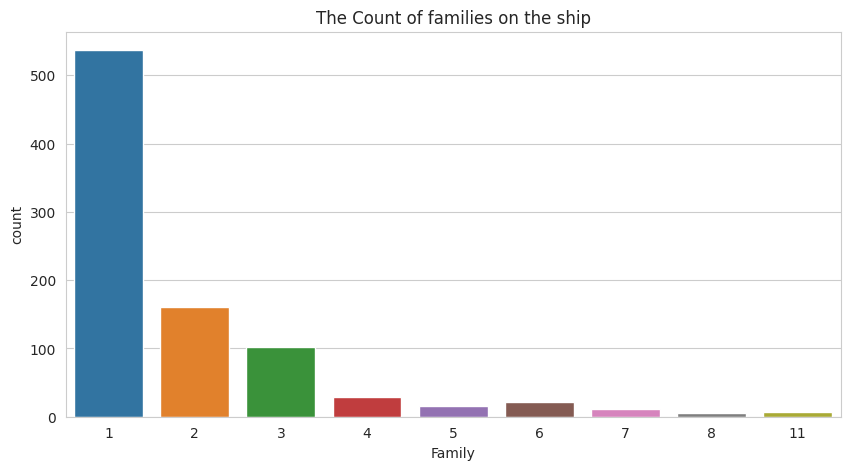

In [25]:
plt.figure(figsize=(10,5))
plt.title("The Count of families on the ship");
sns.countplot(data=train,x='Family');

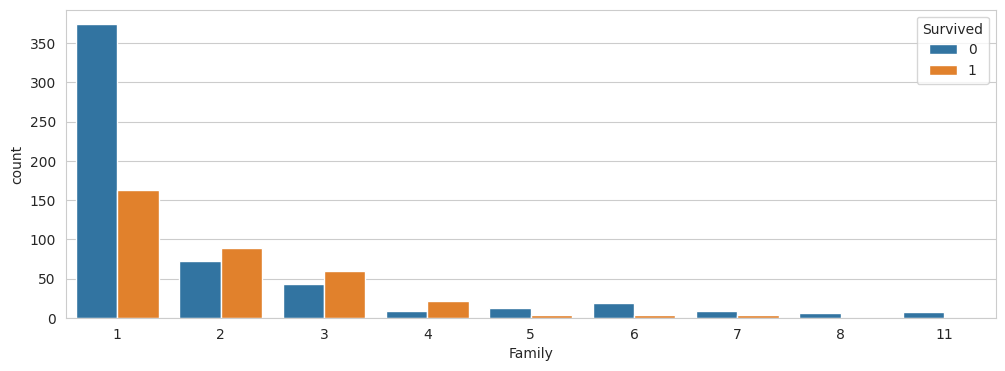

In [26]:
plt.figure(figsize=(12, 4));
sns.countplot(data=train,x="Family",hue='Survived');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


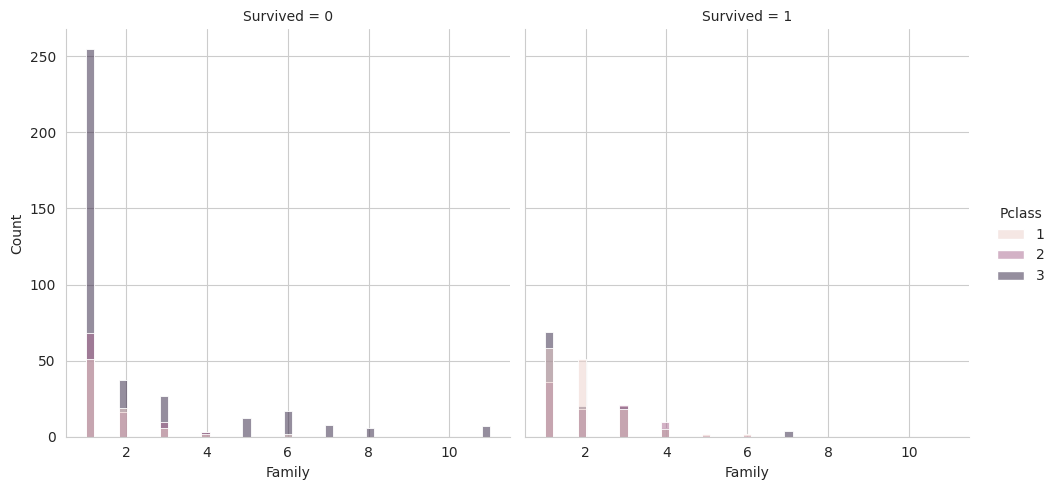

In [27]:
sns.displot(data=train,x='Family',col="Survived",hue='Pclass');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


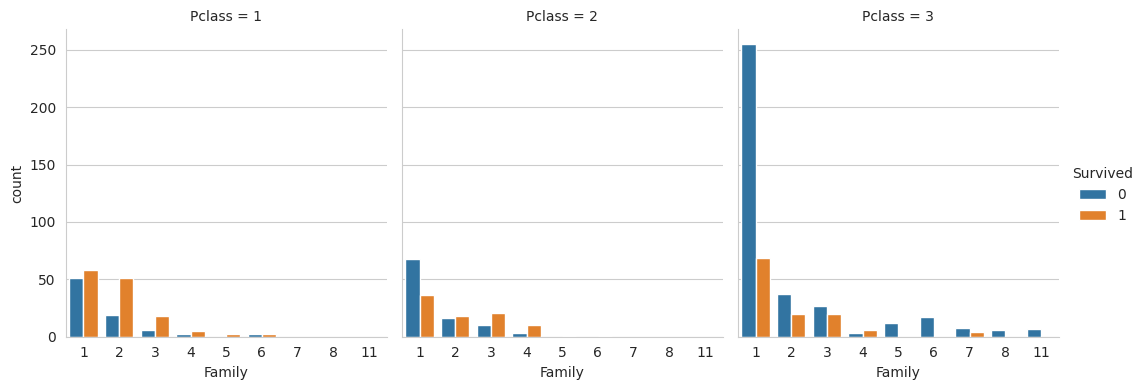

In [28]:
sns.catplot(x="Family", hue="Survived", col="Pclass",data=train, kind="count", height=4, aspect=0.9);

In [29]:
train[(train['Family']==1)& train['Survived']==1]['Sex'].value_counts(normalize=True)

Sex
female    0.607362
male      0.392638
Name: proportion, dtype: float64

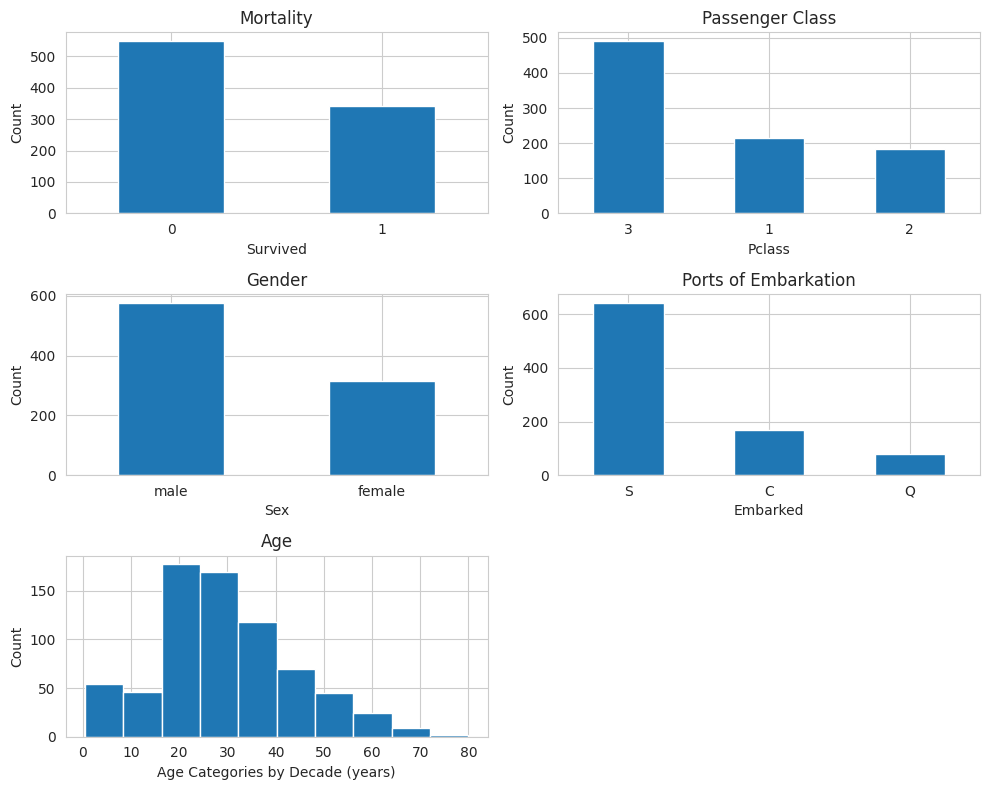

In [30]:
plt.rc('figure', figsize=(10, 8))
fig_size = (3, 2)

# Plot moantality counts
plt.subplot2grid(fig_size, (0, 0));
train['Survived'].value_counts().plot(kind='bar', title='Mortality');
plt.xticks(rotation=0);
plt.ylabel('Count');

# Plot Pclass counts
plt.subplot2grid(fig_size, (0, 1))
train['Pclass'].value_counts().plot(kind='bar', title='Passenger Class')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Gender counts
plt.subplot2grid(fig_size, (1, 0))
train['Sex'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Port counts
plt.subplot2grid(fig_size, (1, 1))
train['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation')
plt.xticks(rotation=0)
plt.ylabel('Count')

# Plot Age histogram
plt.subplot2grid(fig_size, (2, 0))
train['Age'].hist()
plt.title('Age')
plt.ylabel('Count');
plt.xlabel('Age Categories by Decade (years)');

# Adjust spacing between subplots
plt.tight_layout()

In [31]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
dtype: int64

<a class="anchor"  id="chapter3"></a>

In [32]:

X, y = train.drop('Survived', axis=1), train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [34]:
for data in[X_train,X_test,test]:
    title_second_part=data['Name'].str.split(',').str[1]
    title_only=title_second_part.str.split('.').str[0]
    data['title']=title_only.str.strip()
    data['title'].value_counts()

In [35]:
X_train['title'].unique()

array(['Mr', 'Miss', 'Major', 'Mrs', 'Master', 'Rev', 'Dr', 'Col', 'Mlle',
       'Capt', 'Mme', 'Ms', 'the Countess', 'Lady'], dtype=object)

"***age_fill***" function is used to fill in the not assigned data in the '***Age***' column depending on the average of ages for the same titles

In [36]:
def age_fill(data):
    average_age_by_title = data.groupby('title')['Age'].mean()
    data['Age'] = data.apply(
        lambda row: average_age_by_title[row['title']] if pd.isna(row['Age']) else row['Age'],
        axis=1
    )

age_fill(X_train)
age_fill(X_test)
age_fill(test)
test['Age'].fillna(test['Age'].mean(), inplace=True)

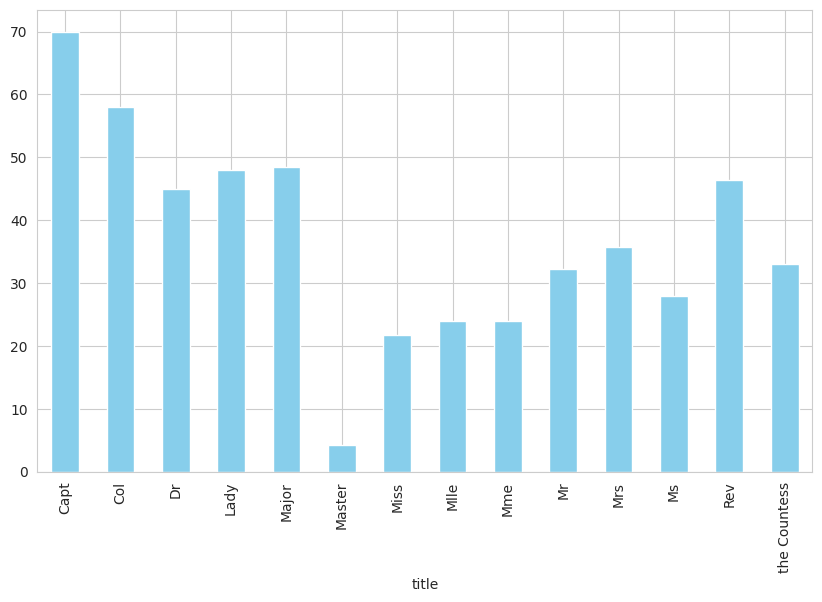

In [37]:
average_age_by_title = X_train.groupby('title')['Age'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6));
average_age_by_title.plot(kind='bar', color='skyblue');

In [38]:
for data in[X_train,X_test,test]:
    counts = data['title'].value_counts()

    # Update the DataFrame to replace counts with 'others'
    counts['others'] = counts[4:].sum()

    # Replace values directly in the 'title' column using loc
    data.loc[data['title'].isin(counts.index[4:]), 'title'] = 'others'
    data['title'].value_counts()

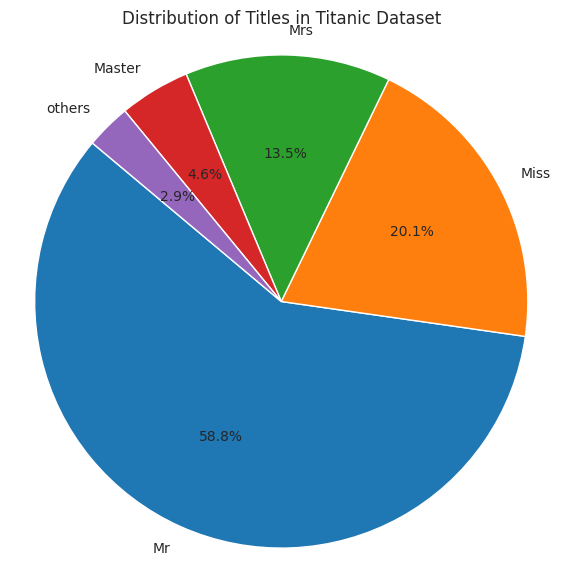

In [39]:

title_counts = X_train['title'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Titles in Titanic Dataset')


plt.axis('equal')  ;

In [40]:
for data in [X_train, X_test,test]:
    
    embarked_mode=data['Embarked'].mode()[0]
    data['Embarked'].fillna(embarked_mode,inplace=True)
    
## Remove Irrelevant Features 

for data in [X_train, X_test]:
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Family','title'],axis=1,inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','title'],axis=1,inplace=True)

In [41]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [42]:

for value in [X_train, X_test,test]:
    value['Sex'].replace({'female':1,'male':0},inplace=True)
    value['Embarked'].replace({'S':0, 'C':1, 'Q':2},inplace=True)

In [43]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

<a class="anchor"  id="chapter4"></a>

In [44]:
logistic_model = LogisticRegression(max_iter=1200, random_state=42)

In [45]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1200, random_state=42)

In [46]:
y_pred=logistic_model.predict(X_test)

In [47]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predict No','Predict Yes'],index=['Actual No','Actual Yes'])

,Predict No,Predict Yes
Actual No,90,15
Actual Yes,20,54


In [48]:

print('Train accuracy is = ',accuracy_score(y_train,logistic_model.predict(X_train)))

Train accuracy is =  0.8019662921348315


Using SVC (non-linear)

In [49]:
svc_classifier=SVC(kernel='rbf',C=10, probability=True)
svc_classifier.fit(X_train,y_train)
print('Train accuracy:', accuracy_score(y_train, svc_classifier.predict(X_train)))

Train accuracy: 0.7275280898876404


**Using RandomForestClassifier**

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],  # Adjust the values as needed
    'max_depth': [None, 5, 10, 15, 20],  # Adjust the values as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the Random Forest classifier
rndm_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rndm_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
print(f"Best Model Training Accuracy: {train_accuracy}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Model Training Accuracy: 0.8623595505617978


To print the best parameters of the function

In [51]:
best_params

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [52]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create the best Random Forest classifier (best_rf) using the tuned hyperparameters
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 max_features=best_params['max_features'],
                                 random_state=42)

# Create the Voting Classifier with the best models
voting_clf_hard = VotingClassifier(estimators=[('lr', logistic_model), ('rf', best_rf), ('svc', svc_classifier)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('lr', logistic_model), ('rf', best_rf), ('svc', svc_classifier)], voting='soft')

# Fit and evaluate the Voting Classifiers'
print('Finding the accuracy Using Hard Voting')
for clf in (logistic_model, best_rf, svc_classifier, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print("\nSoft Voting Classifier:")
for clf in (logistic_model, best_rf, svc_classifier, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Finding the accuracy Using Hard Voting
LogisticRegression 0.8044692737430168
RandomForestClassifier 0.8156424581005587
SVC 0.7206703910614525
VotingClassifier 0.8100558659217877

Soft Voting Classifier:
LogisticRegression 0.8044692737430168
RandomForestClassifier 0.8156424581005587
SVC 0.7206703910614525
VotingClassifier 0.8156424581005587


In [53]:
accuracy_score(y_test, best_rf.predict(X_test))

0.8156424581005587

In [54]:
Prediction = best_rf.predict(test)

In [55]:
Submission = pd.DataFrame({ 'PassengerId': PassengerId,'Survived': Prediction })

In [56]:
Submission.to_csv('Submission_file.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


* [Import Libraries](#chapter1)
* [Reading Data](#chapter2)
    * [Data Preprocessing and EDA](#section1)
    * [Overview about the columns and data visualization](#subsection2)
    * [Adding new features](#subsection3)    
    
* [Data preparing](#chapter3)
* [Using models](#chapter4)